<a href="https://colab.research.google.com/github/ShahJalal-Jamil/BDLifeExpectancy/blob/main/BDLifeExpectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sb
from pylab import rcParams
import scipy
from scipy.stats import spearmanr
plt.style.use('seaborn-whitegrid')
from plotly.offline import init_notebook_mode
from sklearn.utils.validation import check_array, check_is_fitted
from sklearn.base import BaseEstimator, TransformerMixin
import math
colors = ['#c1121f','#669bbc', '#F7D027', '#FFC9ED', '#CCAC93']
plt.style.use('seaborn-white')
plt.rc('figure', figsize=(12,8))
plt.rc('font', size=10)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
from sklearn import metrics
# linear regression feature importance
from sklearn.datasets import make_regression

<ipython-input-1-c8d342e653b5>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-1-c8d342e653b5>:17: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



In [ ]:
!git clone 'https://github.com/ShahJalal-Jamil/BDLifeExpectancy'


import pandas as pd
df1 = pd.read_csv("/content/BDLifeExpectancy/Life Expectancy Data.csv")
df1.sample(10, random_state=44)

fatal: destination path 'BDLifeExpectancy' already exists and is not an empty directory.


,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,schooling,Life_expectancy
2213,Samoa,2002,Developing,174.0,0,3.30,208.168844,86.0,0,67.4,...,5.10,86.0,0.1,1631.417270,176582.0,0.2,0.2,0.653,12.1,76.0
558,Chile,2001,Developing,16.0,2,6.10,687.511683,NaN,0,54.7,...,6.51,97.0,0.1,4595.666327,15444969.0,1.0,1.0,0.761,13.7,77.3
1768,Mozambique,2011,Developing,47.0,66,0.94,40.806180,76.0,177,2.9,...,6.23,76.0,9.6,526.531352,249395.0,3.7,3.6,0.397,9.5,54.3
291,Bhutan,2012,Developing,223.0,0,0.01,188.737366,97.0,1,21.9,...,3.70,97.0,0.6,2422.816000,752967.0,16.1,16.7,0.581,12.3,68.7
2136,Russian Federation,2014,Developing,225.0,13,10.12,1340.553699,97.0,4711,59.9,...,7.70,97.0,0.1,14125.961000,143819666.0,2.3,2.3,0.803,14.9,73.0
603,Comoros,2004,Developing,269.0,2,0.27,7.212111,77.0,0,18.8,...,3.96,76.0,0.1,616.419724,597228.0,7.5,7.5,0.000,9.5,59.8
2099,Republic of Korea,2003,Developing,95.0,3,9.66,0.000000,91.0,33,26.2,...,4.93,97.0,0.1,NaN,NaN,1.6,1.0,NaN,NaN,77.6
1736,Montenegro,2011,Developing,113.0,0,6.56,666.737437,91.0,5,59.7,...,6.92,95.0,0.1,7318.742449,6279.0,1.9,2.0,0.792,15.1,75.4
1237,Iraq,2012,Developing,147.0,32,0.01,429.662508,61.0,15,57.2,...,5.26,69.0,0.1,6651.122420,32776571.0,5.3,5.1,0.656,10.5,76.0
2682,Turkey,2014,Developing,17.0,16,1.45,181.908378,96.0,565,65.3,...,5.41,96.0,0.1,12127.225220,773628.0,4.9,4.7,0.759,14.5,75.5


In [ ]:
#df1 = pd.read_csv(r"D:\uiu\hit\bd\dataset\Life Expectancy Data.csv")
df1.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,schooling,Life_expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


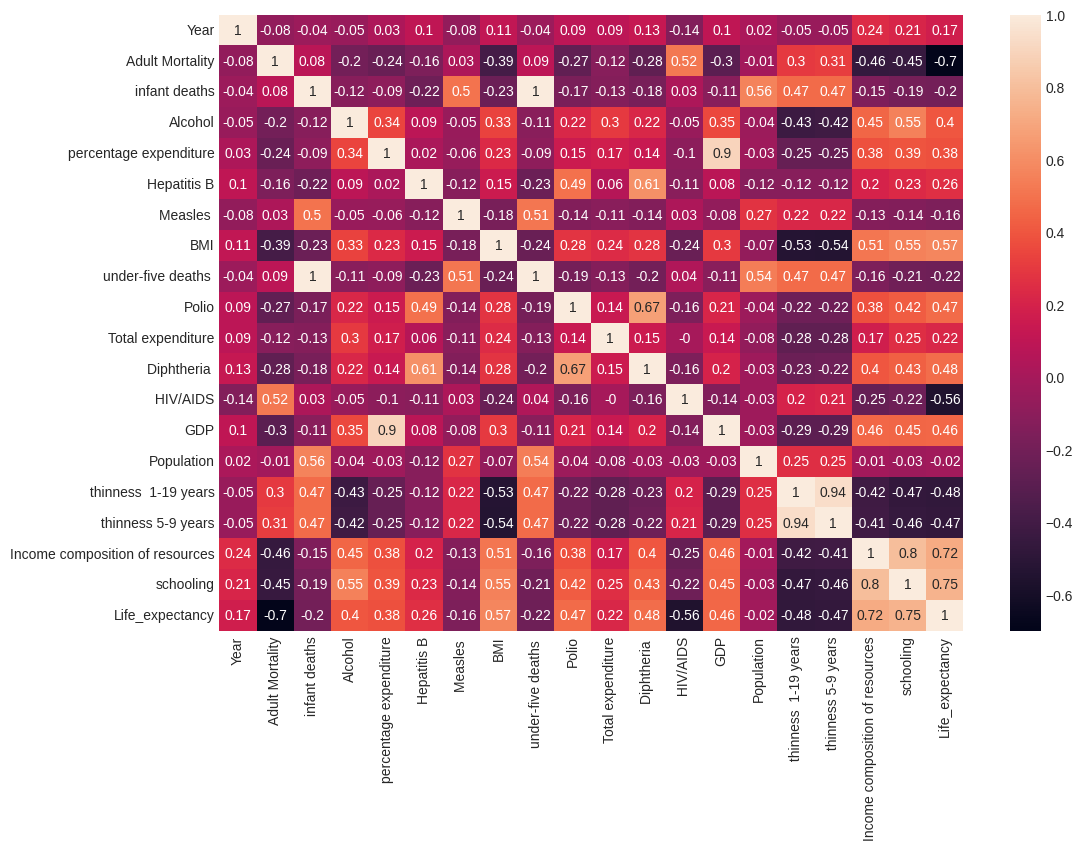

In [ ]:
#Data Visualization using Heatmap
numerical_df = df1.select_dtypes(include=['number'])

matrix = numerical_df.corr().round(2)
sb.heatmap(matrix, annot=True)
plt.show()

In [ ]:
df1[['Country', 'Year', 'Status']].nunique()

Country    193
Year        16
Status       2
dtype: int64

In [ ]:
df1.groupby('Status')['Country'].nunique().reset_index()

,Status,Country
0,Developed,32
1,Developing,161


In [ ]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of columns: {df1.shape[1]}')

Number of rows: 2938
Number of columns: 22


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9   BMI                              2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

In [ ]:
df1.describe()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,schooling,Life_expectancy
count,2938.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000,2928.000000
mean,2007.518720,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793,69.224932
std,4.613841,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920,9.523867
min,2000.000000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,36.300000
25%,2004.000000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000,63.100000
50%,2008.000000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000,72.100000
75%,2012.000000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000,75.700000
max,2015.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000,89.000000


In [ ]:
#Fix columns names formatting errors
columns_name_fixed = []

for column in df1.columns:
    if column == ' thinness  1-19 years':
        column = 'Thinness 10-19 years'
    else:
        column = column.strip(' ').replace("  ", " ")
        column = column[:1].upper() + column[1:]

    columns_name_fixed.append(column)

df1.columns = columns_name_fixed

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Adult Mortality                  2928 non-null   float64
 4   Infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   Percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9   BMI                              2904 non-null   float64
 10  Under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

In [ ]:
pos_correlated_features = ['Income composition of resources', 'Schooling',
                           'GDP', 'Total expenditure',
                           'BMI', 'Diphtheria']
neg_correlated_features = ['Adult Mortality', 'HIV/AIDS',
                           'Thinness 10-19 years', 'Infant deaths']

In [ ]:
df1.isnull().sum()

Country                              0
Year                                 0
Status                               0
Adult Mortality                     10
Infant deaths                        0
Alcohol                            194
Percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
Under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness 10-19 years                34
Thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
Life_expectancy                     10
dtype: int64

In [ ]:
#Class to replace outliers
class OutliersRemover(BaseEstimator, TransformerMixin):
    def __init__(self, baseline=1.5):
        self.baseline = baseline

    def fit(self, X, y=None):
        X = check_array(X, force_all_finite=False) #If non-array, transform into an array
        q1 = np.nanquantile(X, 0.25, axis=0) #First quartile
        q3 = np.nanquantile(X, 0.75, axis=0) #Third quartile
        IQR = q3 - q1
        self.lower_bound = q1 - (self.baseline * IQR)
        self.upper_bound = q3 + (self.baseline * IQR)
        self.n_features_in_ = X.shape[1]
        return self

    def transform(self, X, y=None):
        check_is_fitted(self)
        X = check_array(X, force_all_finite=False)
        assert self.n_features_in_ == X.shape[1]
        X_transformed = X.copy()
        X_transformed = np.where(((X_transformed < self.lower_bound) | (X_transformed > self.upper_bound)),
                                 np.nan,
                                 X_transformed)


        return X_transformed #Returns an array

In [ ]:
#Function to plot box plot
def plot_boxplot(df, columns, title = 'Box plot of features'):

    df = df.copy()

    rows = math.ceil(len(columns)/2)

    fig, ax = plt.subplots(rows, 2, figsize = (14,14))

    for i, column in enumerate(columns):
        ax = plt.subplot(rows, 2, i+1)

        sb.boxplot(x = df[column],
                    data = df,
                    ax = ax,
                    color = colors[0])

        ax.set_xlabel(column)
        ax.set_ylabel('')

    fig.suptitle(title,
                 fontsize=24,
                 x = 0.56);

    fig.text(0.04, 0.5,
             'Density',
             va='center',
             rotation='vertical',
             fontsize=16)

    fig.tight_layout(rect=[0.05, 0.03, 1, 1])

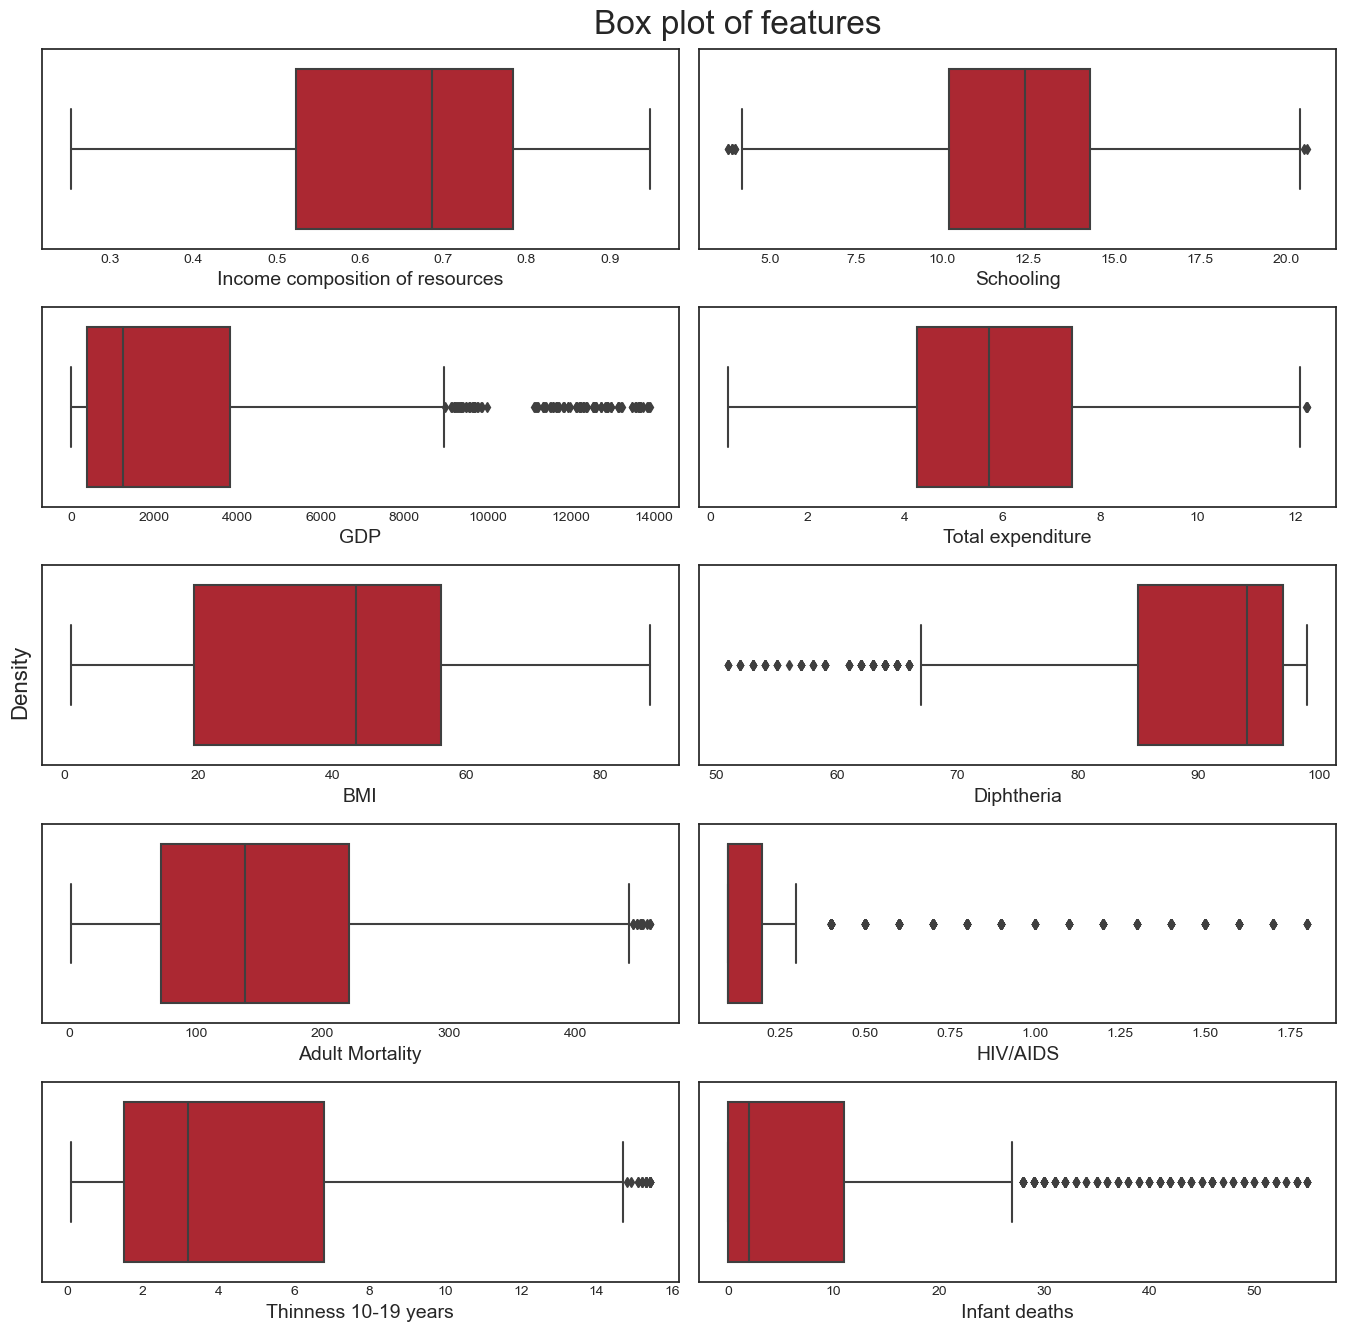

In [ ]:
#Select the features
features = pos_correlated_features + neg_correlated_features

#Create a copy of the Dataframe with the selected features
df_temp = df1[features].copy()

#Create, fit and transform the class OutliersRemover()
remove_outliers = OutliersRemover()
df_temp_without_outliers = remove_outliers.fit_transform(df_temp)

#Transform array back to a DataFrame
df_temp_transformed = pd.DataFrame(data = df_temp_without_outliers, columns = features)

#Plot boxplot
plot_boxplot(df_temp_transformed, features)

In [ ]:
# Replacing the Null Values with mean values of the data
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean',fill_value=None)
df1['Life_expectancy']=imputer.fit_transform(df1[['Life_expectancy']])
df1['Adult Mortality']=imputer.fit_transform(df1[['Adult Mortality']])
df1['Alcohol']=imputer.fit_transform(df1[['Alcohol']])
df1['Hepatitis B']=imputer.fit_transform(df1[['Hepatitis B']])
df1['BMI']=imputer.fit_transform(df1[['BMI']])
df1['Polio']=imputer.fit_transform(df1[['Polio']])
df1['Total expenditure']=imputer.fit_transform(df1[['Total expenditure']])
df1['Diphtheria']=imputer.fit_transform(df1[['Diphtheria']])
df1['GDP']=imputer.fit_transform(df1[['GDP']])
df1['Population']=imputer.fit_transform(df1[['Population']])
df1['Thinness 10-19 years']=imputer.fit_transform(df1[['Thinness 10-19 years']])
df1['Thinness 5-9 years']=imputer.fit_transform(df1[['Thinness 5-9 years']])
df1['Income composition of resources']=imputer.fit_transform(df1[['Income composition of resources']])
df1['Schooling']=imputer.fit_transform(df1[['Schooling']])

In [ ]:
df1.isnull().sum()

Country                            0
Year                               0
Status                             0
Adult Mortality                    0
Infant deaths                      0
Alcohol                            0
Percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
Under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness 10-19 years               0
Thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
Life_expectancy                    0
dtype: int64

In [ ]:
#New dataframes
df_developed = df1.loc[df1['Status']=='Developed'].copy()
df_developing = df1[df1['Status']=='Developing'].copy()
df_thailand = df1.loc[df1['Country']=='Thailand'].copy()
#df_thailand.head()
df_australia = df1.loc[df1['Country']=='Australia'].copy()
df_italy = df1.loc[df1['Country']=='Italy'].copy()
df_singapore = df1.loc[df1['Country']=='Singapore'].copy()
df_switzerland = df1.loc[df1['Country']=='Switzerland'].copy()
df_japan = df1.loc[df1['Country']=='Japan'].copy()
df_bd = df1.loc[df1['Country']=='Bangladesh'].copy()
#df_japan.head()

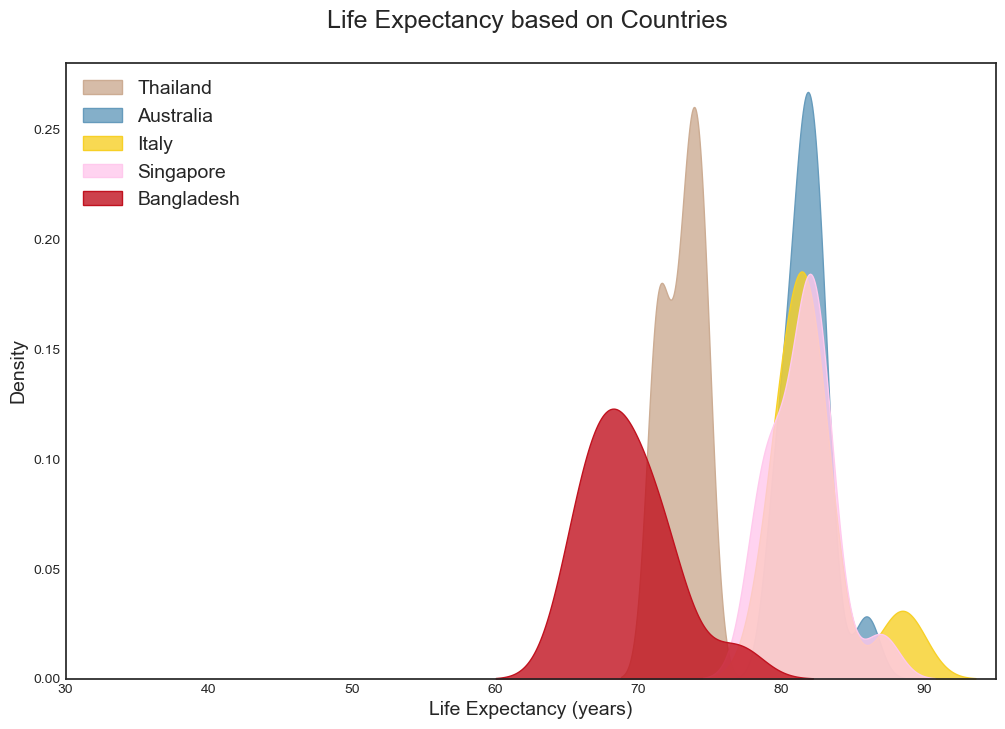

In [ ]:
# Plot the density of life expectancy by country status
sb.kdeplot(df_thailand['Life_expectancy'],  # Plot the density of life expectancy for Selected countries
            label='Thailand',  # Label the Selected countries' density plot
            fill=True,  # Fill the area under the density curve
            color = colors[4],  # Set the color of the Selected countries' density plot
            alpha = 0.8)  # Set the transparency of the Selected countries' density plot

sb.kdeplot(df_australia['Life_expectancy'],
            label='Australia',
            fill=True,
            color=colors[1],
            alpha = 0.8)

sb.kdeplot(df_italy['Life_expectancy'],
            label='Italy',
            fill=True,
            color = colors[2],
            alpha = 0.8)

sb.kdeplot(df_singapore['Life_expectancy'],
            label='Singapore',
            fill=True,
            color=colors[3],
            alpha = 0.8)


sb.kdeplot(df_bd['Life_expectancy'],
            label='Bangladesh',
            fill=True,
            color=colors[0],
            alpha = 0.8)

plt.legend(loc='upper left')  # Add a legend to the plot
plt.ylabel('Density')  # Label the y-axis as "Density"
plt.xlim(30,95)  # Set the limits of the x-axis
plt.xlabel('Life Expectancy (years)')  # Label the x-axis as "Life Expectancy (years)"
plt.title('Life Expectancy based on Countries \n', fontsize=18);  # Set the title of the plot

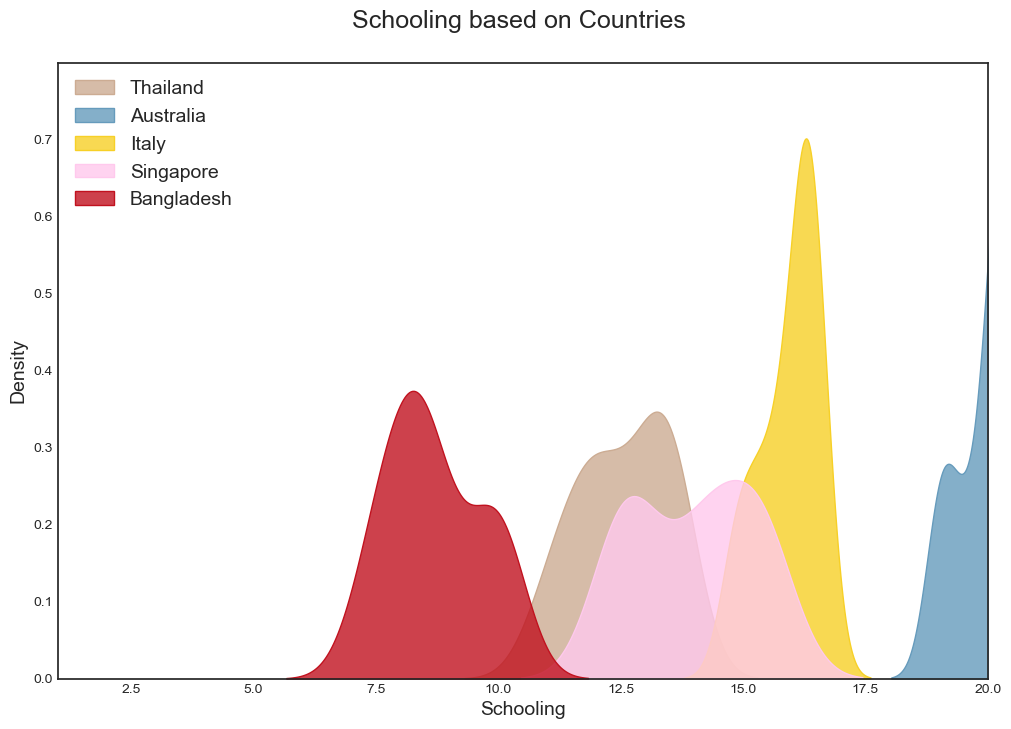

In [ ]:
# Plot the density of life expectancy by country status
sb.kdeplot(df_thailand['Schooling'],  # Plot the density of life expectancy for developed countries
            label='Thailand',  # Label the developed countries' density plot
            fill=True,  # Fill the area under the density curve
            color = colors[4],  # Set the color of the developed countries' density plot
            alpha = 0.8)  # Set the transparency of the developed countries' density plot

sb.kdeplot(df_australia['Schooling'],  # Plot the density of life expectancy for developing countries
            label='Australia',  # Label the developing countries' density plot
            fill=True,  # Fill the area under the density curve
            color=colors[1],  # Set the color of the developing countries' density plot
            alpha = 0.8)  # Set the transparency of the developing countries' density plot

sb.kdeplot(df_italy['Schooling'],  # Plot the density of life expectancy for developed countries
            label='Italy',  # Label the developed countries' density plot
            fill=True,  # Fill the area under the density curve
            color = colors[2],  # Set the color of the developed countries' density plot
            alpha = 0.8)  # Set the transparency of the developed countries' density plot

sb.kdeplot(df_singapore['Schooling'],  # Plot the density of life expectancy for developing countries
            label='Singapore',  # Label the developing countries' density plot
            fill=True,  # Fill the area under the density curve
            color=colors[3],  # Set the color of the developing countries' density plot
            alpha = 0.8)  # Set the transparency of the developing countries' density plot


sb.kdeplot(df_bd['Schooling'],  # Plot the density of life expectancy for developing countries
            label='Bangladesh',  # Label the developing countries' density plot
            fill=True,  # Fill the area under the density curve
            color=colors[0],  # Set the color of the developing countries' density plot
            alpha = 0.8)  # Set the transparency of the developing countries' density plot

plt.legend(loc='upper left')  # Add a legend to the plot
plt.ylabel('Density')  # Label the y-axis as "Density"
plt.xlim(1,20)  # Set the limits of the x-axis
plt.xlabel('Schooling')  # Label the x-axis as "Life Expectancy (years)"
plt.title('Schooling based on Countries \n', fontsize=18);  # Set the title of the plot

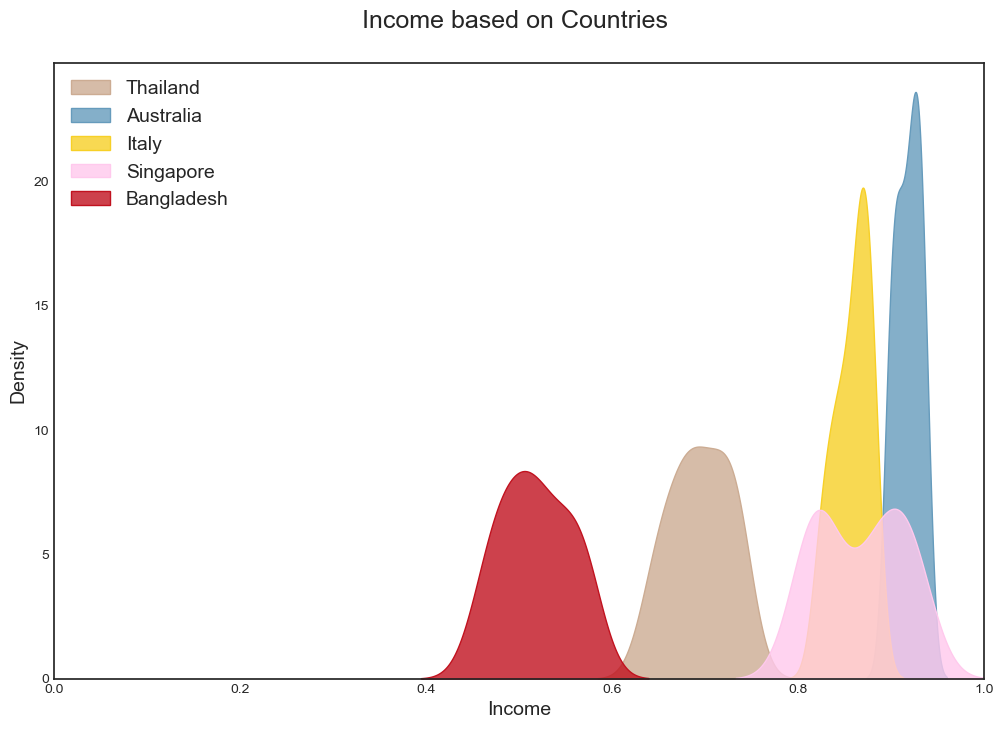

In [ ]:
# Plot the density of life expectancy by country status
sb.kdeplot(df_thailand['Income composition of resources'],  # Plot the density of life expectancy for developed countries
            label='Thailand',  # Label the developed countries' density plot
            fill=True,  # Fill the area under the density curve
            color = colors[4],  # Set the color of the developed countries' density plot
            alpha = 0.8)  # Set the transparency of the developed countries' density plot

sb.kdeplot(df_australia['Income composition of resources'],  # Plot the density of life expectancy for developing countries
            label='Australia',  # Label the developing countries' density plot
            fill=True,  # Fill the area under the density curve
            color=colors[1],  # Set the color of the developing countries' density plot
            alpha = 0.8)  # Set the transparency of the developing countries' density plot

sb.kdeplot(df_italy['Income composition of resources'],  # Plot the density of life expectancy for developed countries
            label='Italy',  # Label the developed countries' density plot
            fill=True,  # Fill the area under the density curve
            color = colors[2],  # Set the color of the developed countries' density plot
            alpha = 0.8)  # Set the transparency of the developed countries' density plot

sb.kdeplot(df_singapore['Income composition of resources'],  # Plot the density of life expectancy for developing countries
            label='Singapore',  # Label the developing countries' density plot
            fill=True,  # Fill the area under the density curve
            color=colors[3],  # Set the color of the developing countries' density plot
            alpha = 0.8)  # Set the transparency of the developing countries' density plot


sb.kdeplot(df_bd['Income composition of resources'],  # Plot the density of life expectancy for developing countries
            label='Bangladesh',  # Label the developing countries' density plot
            fill=True,  # Fill the area under the density curve
            color=colors[0],  # Set the color of the developing countries' density plot
            alpha = 0.8)  # Set the transparency of the developing countries' density plot

plt.legend(loc='upper left')  # Add a legend to the plot
plt.ylabel('Density')  # Label the y-axis as "Density"
plt.xlim(0,1)  # Set the limits of the x-axis
plt.xlabel('Income')  # Label the x-axis as "Life Expectancy (years)"
plt.title('Income based on Countries \n', fontsize=18);  # Set the title of the plot

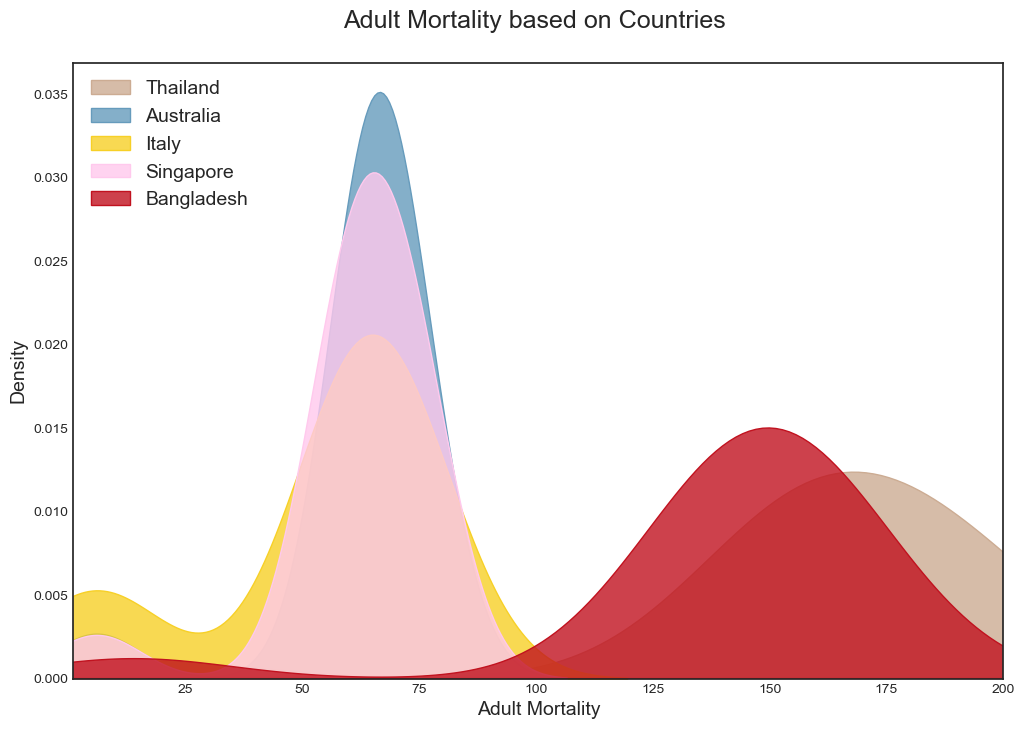

In [ ]:
# Plot the density of life expectancy by country status
sb.kdeplot(df_thailand['Adult Mortality'],  # Plot the density of life expectancy for developed countries
            label='Thailand',  # Label the developed countries' density plot
            fill=True,  # Fill the area under the density curve
            color = colors[4],  # Set the color of the developed countries' density plot
            alpha = 0.8)  # Set the transparency of the developed countries' density plot

sb.kdeplot(df_australia['Adult Mortality'],  # Plot the density of life expectancy for developing countries
            label='Australia',  # Label the developing countries' density plot
            fill=True,  # Fill the area under the density curve
            color=colors[1],  # Set the color of the developing countries' density plot
            alpha = 0.8)  # Set the transparency of the developing countries' density plot

sb.kdeplot(df_italy['Adult Mortality'],  # Plot the density of life expectancy for developed countries
            label='Italy',  # Label the developed countries' density plot
            fill=True,  # Fill the area under the density curve
            color = colors[2],  # Set the color of the developed countries' density plot
            alpha = 0.8)  # Set the transparency of the developed countries' density plot

sb.kdeplot(df_singapore['Adult Mortality'],  # Plot the density of life expectancy for developing countries
            label='Singapore',  # Label the developing countries' density plot
            fill=True,  # Fill the area under the density curve
            color=colors[3],  # Set the color of the developing countries' density plot
            alpha = 0.8)  # Set the transparency of the developing countries' density plot


sb.kdeplot(df_bd['Adult Mortality'],  # Plot the density of life expectancy for developing countries
            label='Bangladesh',  # Label the developing countries' density plot
            fill=True,  # Fill the area under the density curve
            color=colors[0],  # Set the color of the developing countries' density plot
            alpha = 0.8)  # Set the transparency of the developing countries' density plot

plt.legend(loc='upper left')  # Add a legend to the plot
plt.ylabel('Density')  # Label the y-axis as "Density"
plt.xlim(1,200)  # Set the limits of the x-axis
plt.xlabel('Adult Mortality')  # Label the x-axis as "Life Expectancy (years)"
plt.title('Adult Mortality based on Countries \n', fontsize=18);  # Set the title of the plot

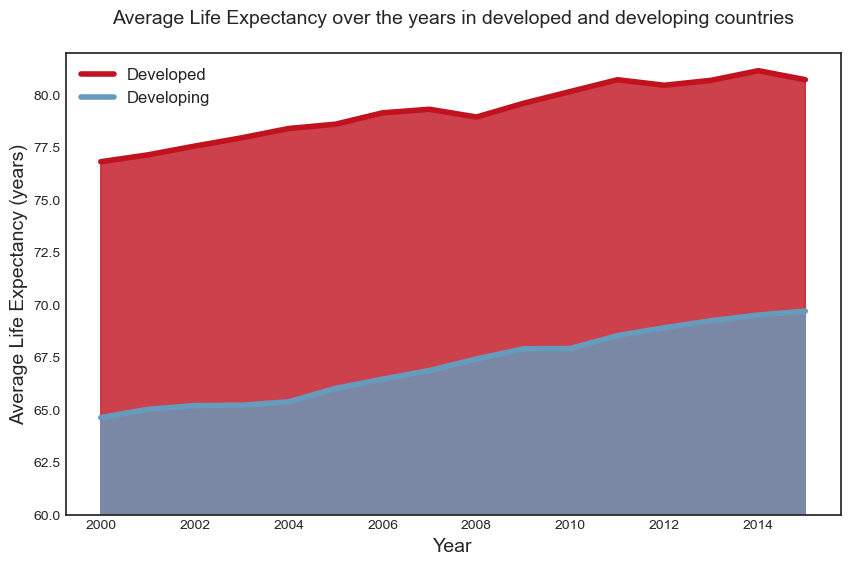

In [ ]:
# Plot average Life Expectancy over the years
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(df_developed.groupby('Year')['Life_expectancy'].mean(),
       label='Developed',
       color=colors[0],
       linewidth=4)

# Fill area between the line plot and the x-axis
ax.fill_between(df_developed.groupby('Year')['Life_expectancy'].mean().index,
                df_developed.groupby('Year')['Life_expectancy'].mean().values,
                color=colors[0],
                alpha=0.8)

ax.plot(df_developing.groupby('Year')['Life_expectancy'].mean(),
       label='Developing',
       color=colors[1],
       linewidth=4,)

ax.fill_between(df_developing.groupby('Year')['Life_expectancy'].mean().index,
                df_developing.groupby('Year')['Life_expectancy'].mean().values,
                color=colors[1],
                alpha=0.8)

plt.legend(loc='upper left', fontsize=12)
ax.set_xlabel('Year')
ax.set_ylabel('Average Life Expectancy (years)')

# Set y-axis limits
ax.set_ylim(60,82)

ax.set_title('Average Life Expectancy over the years in developed and developing countries\n');

In [ ]:
#Function to plot distribution
def plot_distribution(df, columns, title="Distribution of Features"):

    df = df.copy()

    rows = math.ceil(len(columns)/2)

    fig, ax = plt.subplots(rows, 2, figsize = (14,14))

    for i, column in enumerate(columns):
        ax = plt.subplot(rows, 2, i+1)

        sb.kdeplot(df1.loc[df1['Status']=='Developed', column],
                    label='Developed',
                    fill=True,
                    color = colors[0],
                    alpha = 0.8,
                    ax = ax)

        sb.kdeplot(df1.loc[df1['Status']=='Developing',column],
                    label = 'Developing',
                    fill = True,
                    color = colors[1],
                    alpha = 0.8,
                    ax = ax)

        ax.set_xlabel(column)
        ax.set_ylabel('')

    fig.legend(labels=['Developed', 'Developing'],
               loc='center right',
               bbox_to_anchor=(1.145, 0.5))

    fig.suptitle(title,
                 fontsize=24,
                 x = 0.56);

    fig.text(0.04, 0.5,
             'Density',
             va='center',
             rotation='vertical',
             fontsize=16)

    fig.tight_layout(rect=[0.05, 0.03, 1, 1])

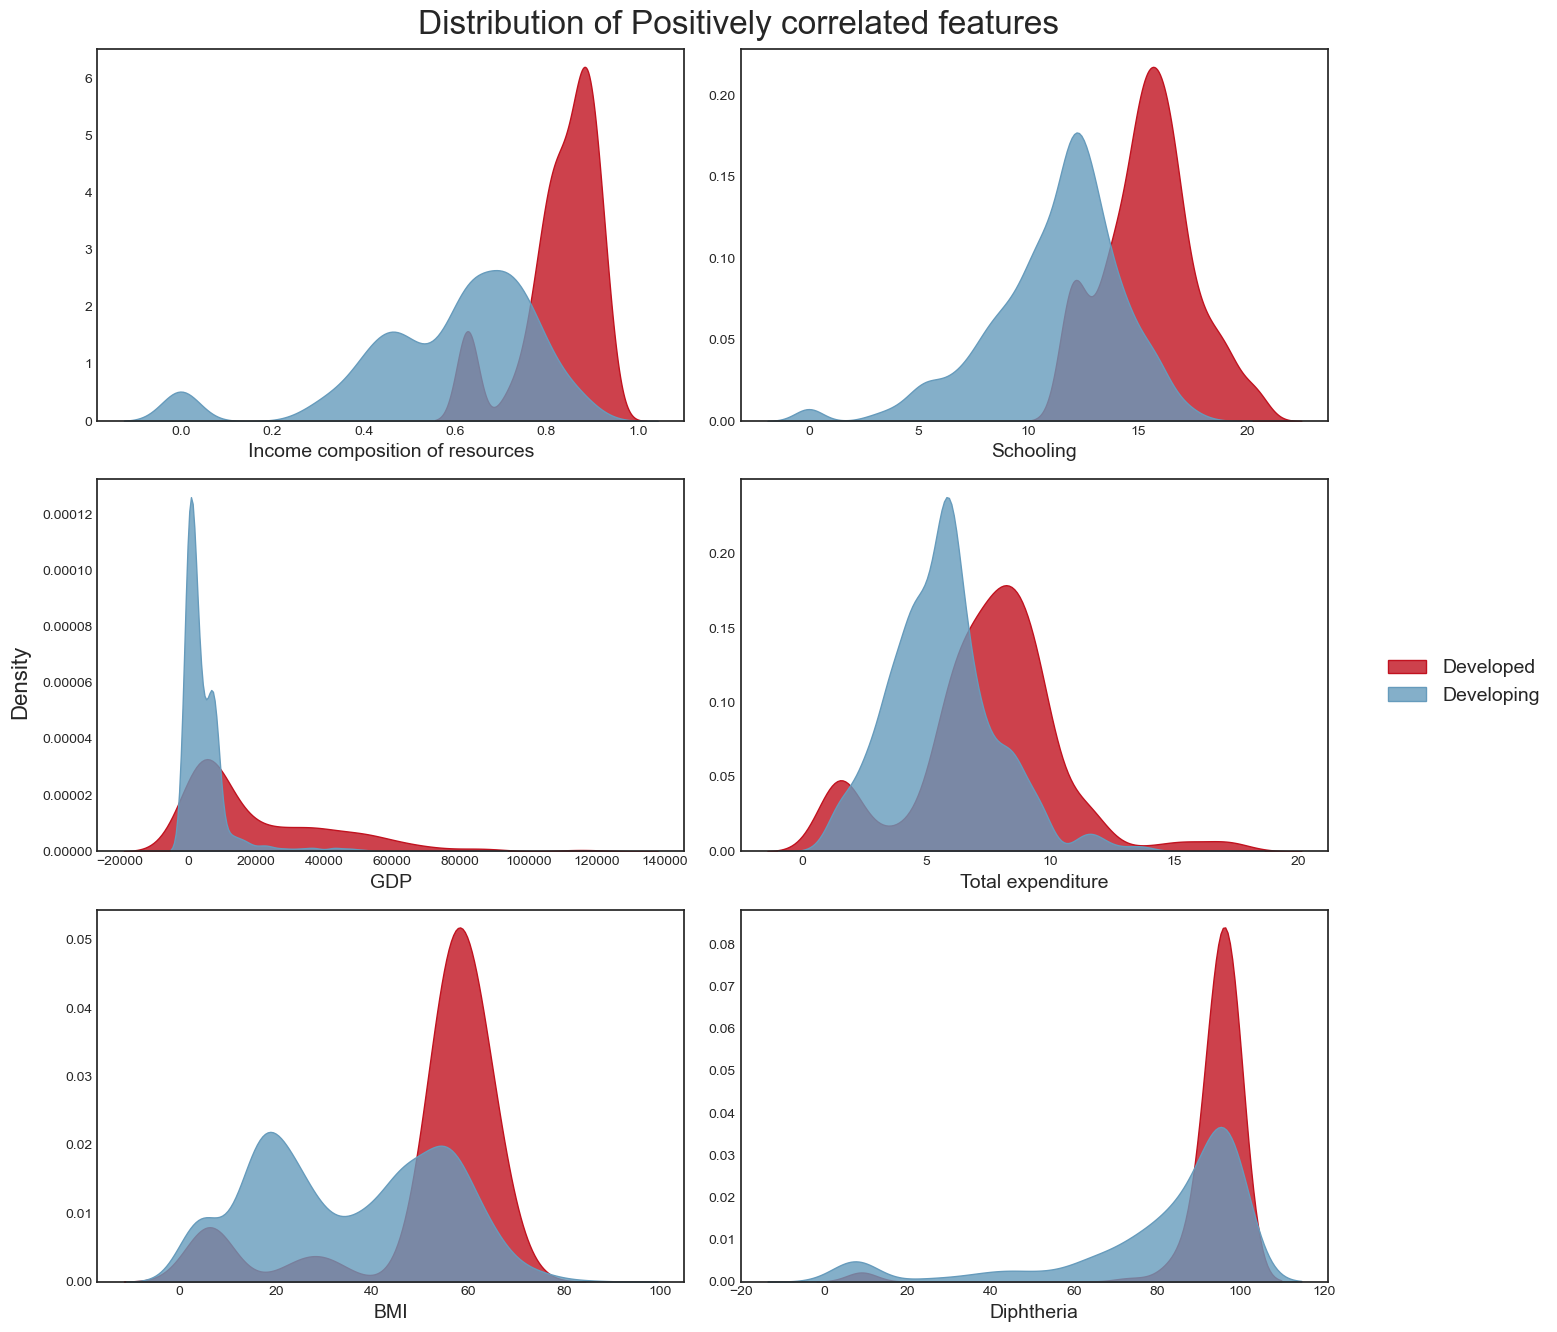

In [ ]:
title = 'Distribution of Positively correlated features'
plot_distribution(df1, pos_correlated_features, title)

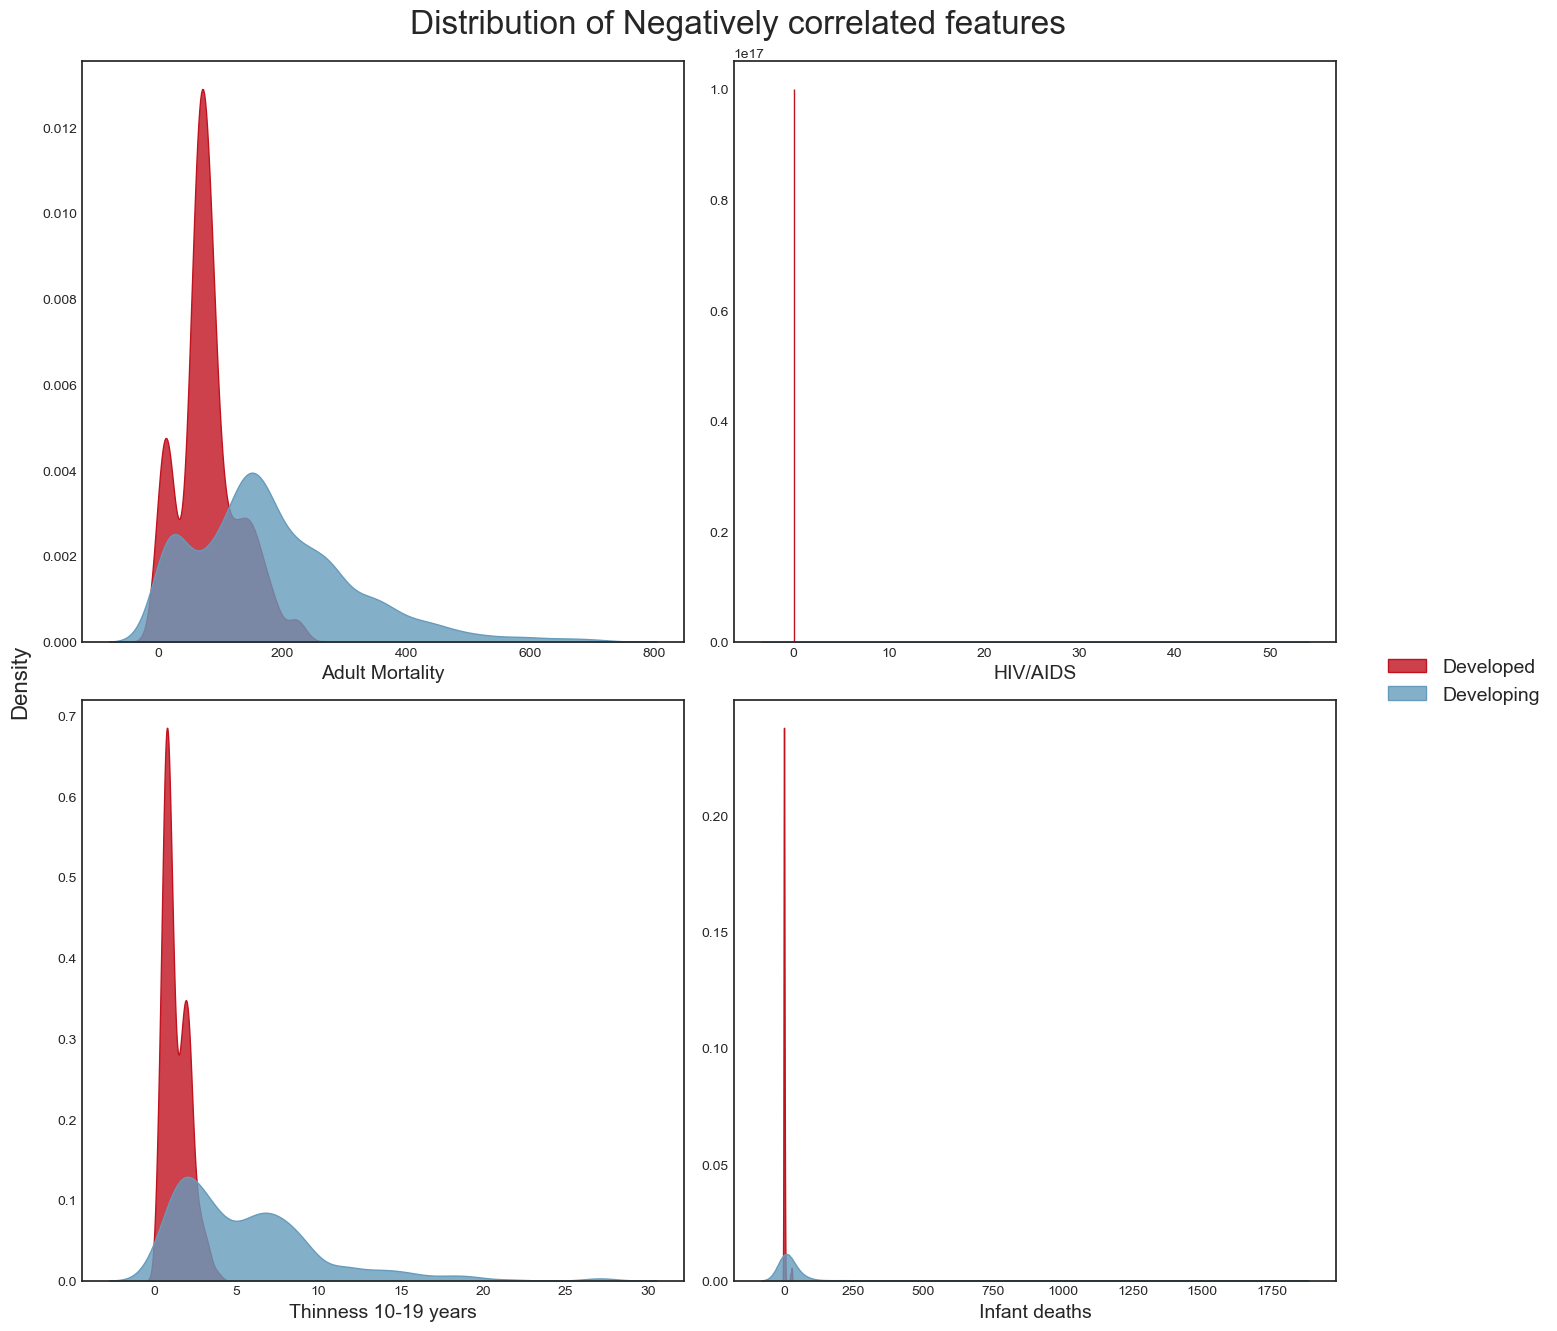

In [ ]:
title = 'Distribution of Negatively correlated features'
plot_distribution(df1, neg_correlated_features, title)

In [ ]:
df2 = df1.drop(['Country','Status','Year'],axis='columns')
df2.head(3)

,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income composition of resources,Schooling,Life_expectancy
0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9


In [ ]:
X = df1[features]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income composition of resources  2938 non-null   float64
 1   Schooling                        2938 non-null   float64
 2   GDP                              2938 non-null   float64
 3   Total expenditure                2938 non-null   float64
 4   BMI                              2938 non-null   float64
 5   Diphtheria                       2938 non-null   float64
 6   Adult Mortality                  2938 non-null   float64
 7   HIV/AIDS                         2938 non-null   float64
 8   Thinness 10-19 years             2938 non-null   float64
 9   Infant deaths                    2938 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 229.7 KB


In [ ]:
y = df2.Life_expectancy
y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life_expectancy, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8084275480041665

In [ ]:
X.columns

Index(['Income composition of resources', 'Schooling', 'GDP',
       'Total expenditure', 'BMI', 'Diphtheria', 'Adult Mortality', 'HIV/AIDS',
       'Thinness 10-19 years', 'Infant deaths'],
      dtype='object')

In [ ]:
y_prediction = lr_clf.predict(X_test)
y_prediction

array([77.44234731, 54.10188766, 75.89591732, 78.59830141, 59.46097859,
       80.80465555, 62.90311951, 70.81599766, 62.3921593 , 74.89334514,
       72.18579905, 74.20727479, 70.98363174, 63.23062888, 79.90661635,
       69.33261556, 73.83318274, 80.09384984, 72.30406473, 72.12322198,
       73.26432163, 59.92064728, 76.345329  , 75.78597853, 67.11910158,
       68.47434715, 82.26017202, 80.94788126, 77.95083736, 64.15758286,
       77.3557678 , 80.5304342 , 80.21011693, 62.99242121, 72.6677821 ,
       78.68834456, 82.65903034, 63.64700407, 62.6354535 , 70.47742069,
       74.80589996, 63.44024463, 66.9024058 , 66.153204  , 72.56062564,
       83.54670075, 76.59240531, 69.69364455, 77.32618635, 75.90529968,
       71.83032445, 53.03168769, 71.98601355, 77.12537724, 82.17625732,
       73.31894205, 68.25330092, 61.30096585, 63.92474269, 61.95420764,
       56.68026519, 74.62857366, 68.05548427, 60.76689889, 78.36895687,
       66.61171221, 71.5889809 , 59.67293948, 77.14371888, 78.09

In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error
print('\naccuracy(R^2): {}%'.format(lr_clf.score(X_test, y_test)*100))
print('\nMAE: {}'.format(mean_absolute_error(y_test, y_prediction)))
print('\nRMAE: {}'.format(np.sqrt(mean_absolute_error(y_test, y_prediction))))


accuracy(R^2): 80.84275480041666%

MAE: 3.0565709988708356

RMAE: 1.7483051789864479


In [ ]:
demo_pred=lr_clf.predict([[0.675,15.0,784.26,10.6,18.1,90,90,0.1,2.1,50]])
demo_pred

C:\Users\jm\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([74.08370776])

In [ ]:
rmse = np.sqrt(mean_squared_error(y_train, lr_clf.predict(X_train)))
print('The Root Mean Square Error : ' , rmse)
print('The r2 score : ', lr_clf.score(X_train, y_train))

The Root Mean Square Error :  4.251577952006442
The r2 score :  0.8005146340111221


In [ ]:
y_test_1 =np.array(range(0,len(y_test)))

Test r2 error =  0.8084275480041665


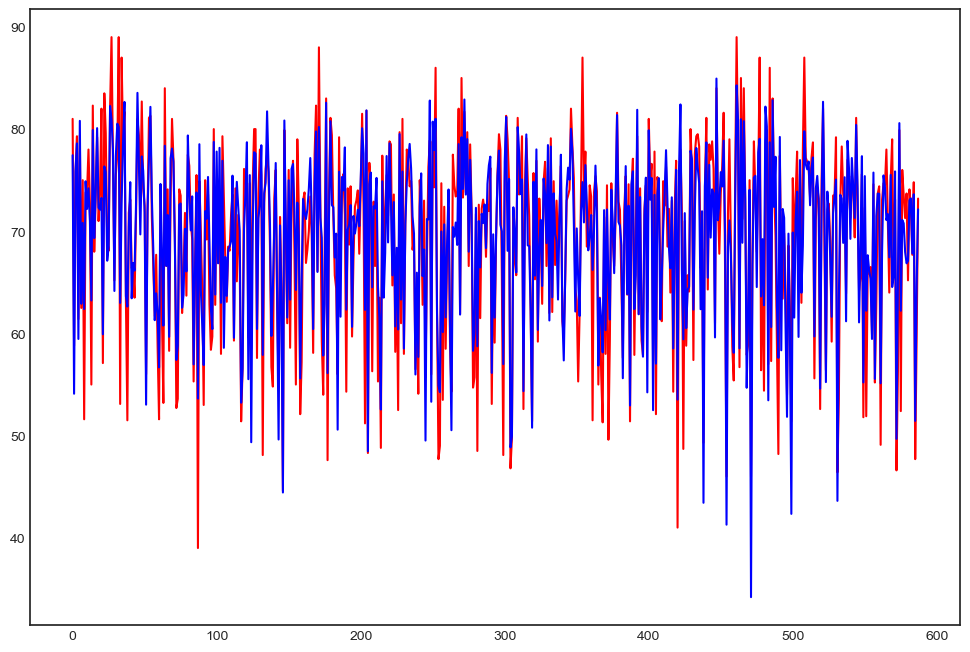

In [ ]:
r2_degeri = metrics.r2_score(y_test, y_prediction)
print("Test r2 error = ",r2_degeri)

plt.plot(y_test_1,y_test,color="red")
plt.plot(y_test_1,y_prediction,color="blue")
plt.show()

In [ ]:
# Calculating Mean Errors
MeanError = metrics.mean_absolute_error(y_test,y_prediction)
MeanSquaredError = metrics.mean_squared_error(y_test,y_prediction)

print("Mean Absolute Error: ", MeanError)
print("Mean Square Error: ", MeanSquaredError)

Mean Absolute Error:  3.0565709988708356
Mean Square Error:  17.11916181988954


In [ ]:
# Prediction using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor()
et.fit(X_train, y_train)

y_pred1 = et.predict(X_test)

et_mse = metrics.mean_squared_error(y_test, y_pred1)
et_r2 = metrics.r2_score(y_test, y_pred1)
print("Mean squared error =", et_mse)
print("R2 Score =", et_r2)

Mean squared error = 2.915100260579261
R2 Score = 0.9673784902200039


Test r2 error =  0.9673784902200039


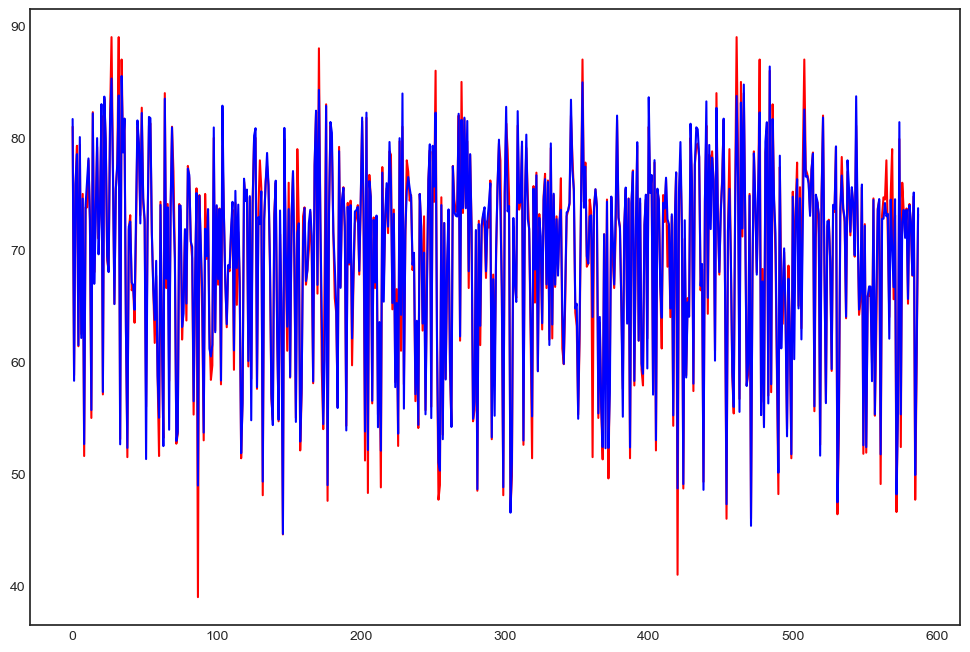

In [ ]:
r2_degeri = metrics.r2_score(y_test, y_pred1)
print("Test r2 error = ",r2_degeri)

plt.plot(y_test_1,y_test,color="red")
plt.plot(y_test_1,y_pred1,color="blue")
plt.show()

In [ ]:
#['Income composition of resources', 'Schooling', 'GDP','Total expenditure', 'BMI', 'Diphtheria', 'Adult Mortality', 'HIV/AIDS',
#       'Thinness 10-19 years', 'Infant deaths'],

demo_pred1=et.predict([[0.675,15.0,784.26,10.6,18.1,90,90,0.1,2.1,50]])
demo_pred1

C:\Users\jm\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names



array([76.085])

In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error
print('\naccuracy(R^2): {}%'.format(et.score(X_test, y_test)*100))
print('\nMAE: {}'.format(mean_absolute_error(y_test, y_pred1)))
print('\nRMAE: {}'.format(np.sqrt(mean_absolute_error(y_test, y_pred1))))


accuracy(R^2): 96.73784902200039%

MAE: 0.975089012722574

RMAE: 0.9874659552220391


In [ ]:
# Calculating Mean Errors
MeanError = metrics.mean_absolute_error(y_test,y_pred1)
MeanSquaredError = metrics.mean_squared_error(y_test,y_pred1)

print("Mean Absolute Error: ", MeanError)
print("Mean Square Error: ", MeanSquaredError)

Mean Absolute Error:  0.975089012722574
Mean Square Error:  2.915100260579261


Feature: 0, Score: 6.99948
Feature: 1, Score: 0.71144
Feature: 2, Score: 0.00006
Feature: 3, Score: 0.13410
Feature: 4, Score: 0.04545
Feature: 5, Score: 0.05458
Feature: 6, Score: -0.02092
Feature: 7, Score: -0.47882
Feature: 8, Score: -0.10342
Feature: 9, Score: -0.00117


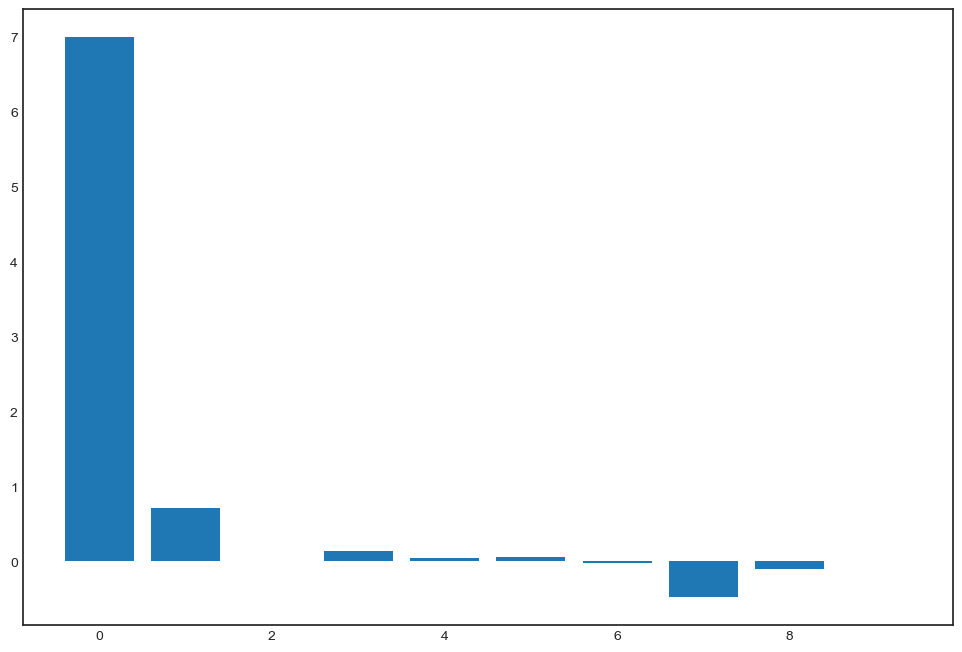

In [ ]:
importance = lr_clf.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
#data = list(zip(df1.columns, lr_clf.coef_))
#new_df = pd.DataFrame(data, columns =['Feature', 'Importance'])
#print(new_df)
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
# get coeficients and their respective feature names
coef_series = pd.Series(
  data=lr_clf.coef_,
  index=lr_clf.feature_names_in_
)

print(coef_series)

Income composition of resources    6.999484
Schooling                          0.711438
GDP                                0.000056
Total expenditure                  0.134102
BMI                                0.045455
Diphtheria                         0.054584
Adult Mortality                   -0.020925
HIV/AIDS                          -0.478824
Thinness 10-19 years              -0.103420
Infant deaths                     -0.001166
dtype: float64


In [ ]:
# Calculate the correlation coefficient
scorr_coef = df1['Schooling'].corr(df1['Life_expectancy'])
print('Schooling Correlation coefficient:', scorr_coef)
icorr_coef = df1['Income composition of resources'].corr(df1['Life_expectancy'])
print('Income Correlation coefficient:', icorr_coef)
tcorr_coef = df1['Total expenditure'].corr(df1['Life_expectancy'])
print('Total expenditure Correlation coefficient:', tcorr_coef)
bcorr_coef = df1['BMI'].corr(df1['Life_expectancy'])
print('BMI Correlation coefficient:', bcorr_coef)
hcorr_coef = df1['HIV/AIDS'].corr(df1['Life_expectancy'])
print('HIV/AIDS Correlation coefficient:', hcorr_coef)
thcorr_coef = df1['Thinness 10-19 years'].corr(df1['Life_expectancy'])
print('Thinness 10-19 years Correlation coefficient:', thcorr_coef)
adcorr_coef = df1['Adult Mortality'].corr(df1['Life_expectancy'])
print('Adult Mortality Correlation coefficient:', adcorr_coef)
gcorr_coef = df1['GDP'].corr(df1['Life_expectancy'])
print('GDP Correlation coefficient:', gcorr_coef)
ifcorr_coef = df1['Infant deaths'].corr(df1['Life_expectancy'])
print('Infant deaths Correlation coefficient:', ifcorr_coef)
dfcorr_coef = df1['Diphtheria'].corr(df1['Life_expectancy'])
print('Diphtheria Correlation coefficient:', dfcorr_coef)

Schooling Correlation coefficient: 0.7150663398620061
Income Correlation coefficient: 0.692482804960857
Total expenditure Correlation coefficient: 0.20798062451867796
BMI Correlation coefficient: 0.5592553046406493
HIV/AIDS Correlation coefficient: -0.5564568165997136
Thinness 10-19 years Correlation coefficient: -0.4721618794367623
Adult Mortality Correlation coefficient: -0.6963593137699757
GDP Correlation coefficient: 0.43049301854946426
Infant deaths Correlation coefficient: -0.1965350030769952
Diphtheria Correlation coefficient: 0.4754183849366064
